In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare
from env import get_db_url

import warnings
warnings.filterwarnings("ignore")


Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.

Bonus:

Discover users who are accessing our curriculum pages way beyond the end of their codeup time. What would the dataframe look like? Use time series method for detecting anomalies, like exponential moving average with %b.

Can you label students who are viewing both the web dev and data science curriculum? Can you label students by the program they are in? Can you label users by student vs. staff?

In [2]:
# Acquire data from either SQL server or cached csv
df = acquire.acquire()
# Prepare data by downselecting columns, converting date to datetime format, changing index to date
df = prepare.prepare_curriculum(df)

In [3]:
# Not all cohort ids were filled in from the database source
df.isna().sum()

date             0
path             1
user_id          0
cohort_id    52893
ip               0
dtype: int64

In [11]:
# Resample dataframe daily and take the total count of entries for that day. Save to pages
pages = df.path.resample('d').count()

Text(0, 0.5, 'Number of Entries')

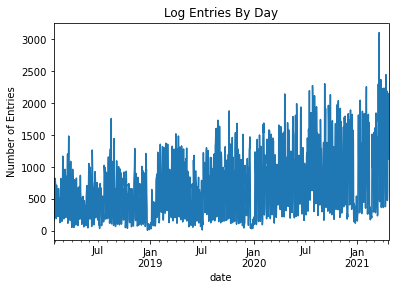

In [13]:
# Plot entries by date
pages.plot()
plt.title('Log Entries By Day')
plt.ylabel('Number of Entries')

### Exponential Moving Average

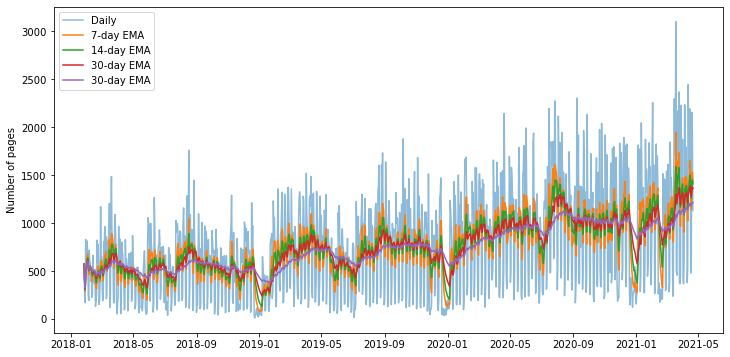

In [15]:
# Compute 7,14,30, and 90 day emas of counts of log entries

ema_7d = pages.ewm(span=7).mean()
ema_14d= pages.ewm(span=14).mean()
ema_30d= pages.ewm(span=30).mean()
ema_90d= pages.ewm(span=90).mean()

fig, ax = plt.subplots(figsize=(12,6))

# Plot count of entries (daily resample)
ax.plot(pages.index, pages, label='Daily', alpha=.5)
# Plot EMAs overlayed
ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_90d, label = '30-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()
